## 调用scikit-learn训练回归模型

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from plot_decision_region import plot_decision_region
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# 使用train_test_split方法将数据集分割成两部分,训练集合测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
# 使用StandardScaler方法来对数据进行标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 使用fit方法计算出u(样本平均值)和标准差,然后调用transform方法对数据集进行标准化,使用相同的参数对训练集和测试集进行标准化
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [5]:
# 组合数据
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

In [6]:
# 导入模块
from sklearn.linear_model import LogisticRegression

In [7]:
# 初始化
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(x_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

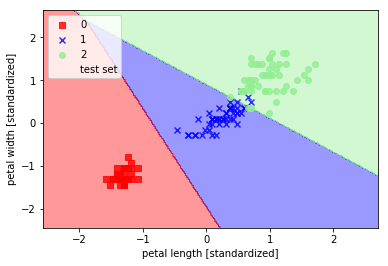

In [8]:
plot_decision_region(x_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

对数据进行预测

In [9]:
# 预测三种鸢尾花的概率
lr.predict_proba(x_test_std[0:])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01],
       [6.08753106e-04, 9.99285569e-01, 1.05678028e-04],
       [8.16962653e-01, 1.83037347e-01, 6.48299403e-14],
       [1.60866539e-11, 4.14084479e-01, 5.85915521e-01],
       [8.00231776e-01, 1.99768224e-01, 1.07576258e-13],
       [2.03283749e-13, 1.38353563e-01, 8.61646437e-01],
       [8.64726967e-01, 1.35273033e-01, 9.27705289e-14],
       [4.92680691e-07, 7.61844645e-01, 2.38154862e-01],
       [6.63326495e-07, 8.43292211e-01, 1.56707126e-01],
       [8.06447009e-05, 9.97737477e-01, 2.18187798e-03],
       [9.03984802e-09, 4.62107297e-01, 5.37892694e-01],
       [1.54213753e-06, 8.75626483e-01, 1.24371975e-01],
       [5.21240195e-06, 9.81860065e-01, 1.81347231e-02],
       [8.78337572e-07, 8.24894420e-01, 1.75104701e-01],
       [1.13609831e-06, 8.90634747e-01, 1.09364117e-01],
       [7.63277074e-01, 2.36722926e-01, 4.48028267e-14],
       [1.54213753e-06, 8.75626483e-01, 1.24371975e-01],
       [2.17883410e-05, 9.95361

## 使用正则化解决过拟合问题

正则化背后的原理就是引入额外的信息(偏差)来惩罚过大的权重参数

In [10]:
weights, params = [], []

In [15]:
for c in np.arange(-5, 5, dtype=float):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

In [16]:
weights = np.array(weights)

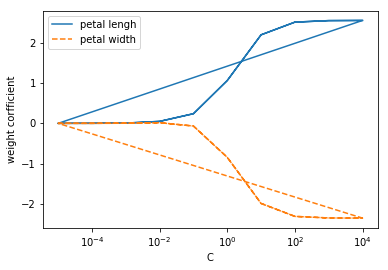

In [21]:
plt.plot(params, weights[:, 0], label='petal lengh')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('weight corfficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

减小c值,也就是增大正则系数的值,正则化威力增强

从上图看出随着C的减小,权重系数也减小